In [1]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import freqs, iirfilter
import matplotlib.pyplot as plt
import speech_recognition as sr
import librosa

In [2]:
def load_audio(file_path):
    y, sample_rate = librosa.load(file_path) 
    return y, sample_rate

In [3]:
def extract_mfcc_feature(file_path):
    y, sr = load_audio(file_path)
    new_sr =  16000
    mfcc = librosa.feature.mfcc(y=y, sr=new_sr, n_mfcc=13)
    return mfcc

In [4]:
def visualize_spectogram(audio, file_name):
    y, sr = librosa.load(audio)
    # Compute spectrogram
    spec = librosa.feature.melspectrogram(y=y, sr=sr)

    # Convert power to decibels
    spec_db = librosa.power_to_db(spec, ref=np.max)

    # Plot spectrogram
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    img = librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', ax = ax)
    fig.colorbar(img, ax = ax, format='%+2.0f dB')
    #ax.set_title('Spectrogram')
    #fig.show()
    fig.savefig(file_name)
    plt.close()

In [5]:
def visualize_mfcc(mfcc, file_name):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    #plt.title('MFCC')
    plt.savefig(file_name)
    #plt.show()
    plt.close()

In [15]:
import csv
import os

def read_csv_file(file_path):
    with open(file_path, 'r', newline='') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=',')
        header = csv_reader.fieldnames
        print("start iteration")
        print(header)

        for row in csv_reader:
            try:
                file_name = "dia" + row['Dialogue_ID'] + "_utt" + row['Utterance_ID']
                path = "./train_audio/" + file_name + ".wav"
                image_name = "./test_mfcc_all/" + file_name + ".png"
                image_name_2 = "./test_spectogram/"+ file_name + ".png"
                
                if(os.path.exists(image_name) == True): continue
                print(image_name)
                print(image_name_2)
                
                #print("did it pass here?")
                mfcc = extract_mfcc_feature(path)
                visualize_mfcc(mfcc, image_name)
                visualize_spectogram(path, image_name_2)
            except FileNotFoundError:
                print("Error: The specified file does not exist.")
            except Exception as e:
                print(f"Error: {e}")
    print("CSV file reading and iteration completed.")
    


In [14]:
os.makedirs("./test_mfcc_all/", exist_ok=True)
os.makedirs("./test_spectogram/", exist_ok=True)

In [16]:
read_csv_file('./test_data.csv')

start iteration
['Dialogue_ID', 'Utterance_ID', 'Utterance', 'Emotion']
./test_mfcc_all/dia530_utt0.png
./test_spectogram/dia530_utt0.png
./test_mfcc_all/dia956_utt10.png
./test_spectogram/dia956_utt10.png
./test_mfcc_all/dia991_utt4.png
./test_spectogram/dia991_utt4.png
./test_mfcc_all/dia568_utt7.png
./test_spectogram/dia568_utt7.png
./test_mfcc_all/dia955_utt6.png
./test_spectogram/dia955_utt6.png
./test_mfcc_all/dia699_utt8.png
./test_spectogram/dia699_utt8.png
./test_mfcc_all/dia123_utt6.png
./test_spectogram/dia123_utt6.png
./test_mfcc_all/dia54_utt3.png
./test_spectogram/dia54_utt3.png
./test_mfcc_all/dia535_utt0.png
./test_spectogram/dia535_utt0.png
./test_mfcc_all/dia939_utt7.png
./test_spectogram/dia939_utt7.png
./test_mfcc_all/dia365_utt0.png
./test_spectogram/dia365_utt0.png
./test_mfcc_all/dia938_utt4.png
./test_spectogram/dia938_utt4.png
./test_mfcc_all/dia946_utt7.png
./test_spectogram/dia946_utt7.png
./test_mfcc_all/dia654_utt1.png
./test_spectogram/dia654_utt1.png
./te

In [7]:
path ="./train_audio/dia0_utt10.wav"

mfcc = extract_mfcc_feature(path)


In [10]:
visualize_mfcc(mfcc)

TypeError: visualize_mfcc() missing 1 required positional argument: 'file_name'

In [ ]:
def create_spectogram_image(file_path):
    extract_mfcc_features

In [11]:
audio = load_audio("./train_audio/dia0_utt10.wav")

spectrogram = np.abs(librosa.stft(audio))

ParameterError: Audio data must be of type numpy.ndarray

In [9]:
spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

ValueError: For X (1026) and Y (14) with flat shading, A should have shape (13, 1025, 3) or (13, 1025, 4) or (13, 1025) or (13325,), not (13, 1025, 1)

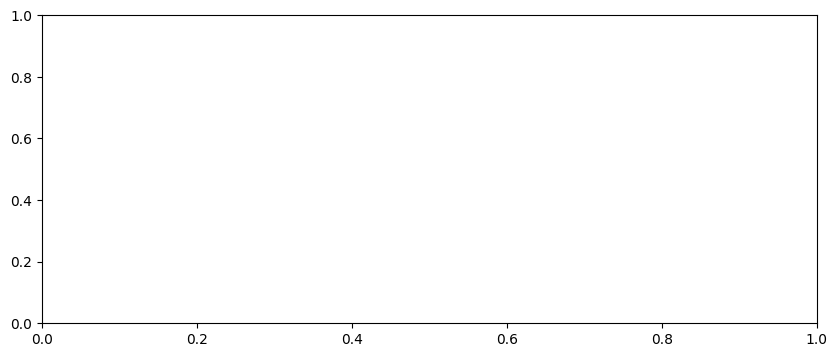

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()